# Информация о датасете Car Evaluation

**Источник:**  
[Car Evaluation Database, UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

**Описание:**  
Датасет предназначен для оценки качества автомобилей на основе иерархической модели DEX. Содержит 1728 объектов с категориальными признаками.

---

## Характеристика признаков

| Признак   | Возможные значения       | Описание                           |
|-----------|------------------------|-----------------------------------|
| buying    | vhigh, high, med, low  | Цена покупки автомобиля           |
| maint     | vhigh, high, med, low  | Стоимость обслуживания автомобиля |
| doors     | 2, 3, 4, 5more         | Количество дверей                 |
| persons   | 2, 4, more             | Вместимость (количество человек) |
| lug_boot  | small, med, big        | Объем багажника                   |
| safety    | low, med, high         | Уровень безопасности              |

**Целевая переменная:**

| Признак | Значения              | Описание               |
|---------|---------------------|-----------------------|
| class   | unacc, acc, good, vgood | Общая оценка автомобиля |

---

## Предобработка данных

1. **Кодирование категориальных признаков**  
   Все признаки и целевая переменная преобразованы в числовой формат с помощью `LabelEncoder` для использования в моделях машинного обучения.

2. **Разделение на признаки и целевую переменную**  
   - `X` — матрица признаков (все колонки кроме `class`).  
   - `y` — целевая переменная (`class`).

3. **Разделение на обучающую и тестовую выборки**  
   Использован метод `train_test_split` с параметром `test_size=0.2`, чтобы выделить 20% данных для тестирования.

4. **Подготовка данных для нейросети**  
   - Целевая переменная преобразована в one-hot encoding (`to_categorical`).  
   - Признаки приведены к типу `float32`.


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Загружаем датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

# Кодируем категориальные признаки в числа
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Разделяем на признаки и целевую переменную
X = data.drop("class", axis=1)
y = data["class"]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Данные подготовлены.")


Данные подготовлены.


# Методы классификации

В данной работе используются следующие методы классификации:

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

Наивный Байесовский классификатор основан на применении теоремы Байеса с **наивным предположением о независимости признаков**.  
Используются следующие варианты:  

- **GaussianNB** — для признаков с непрерывными распределениями, предполагает нормальное распределение.  
- **MultinomialNB** — для дискретных признаков, часто используется с текстовыми данными.  
- **ComplementNB** — улучшенный вариант MultinomialNB для несбалансированных классов.  
- **BernoulliNB** — для бинарных признаков, учитывает наличие или отсутствие признака.

---

## 2. Деревья решений (Decision Tree)

Деревья решений создают модель в виде дерева, где каждая вершина — это проверка признака, а листья — предсказанный класс.  
Основные преимущества:  
- Простота интерпретации.  
- Возможность обработки как категориальных, так и числовых признаков.  
- Автоматический выбор наиболее информативных признаков.

---

## 3. Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA)

LDA ищет **линейные комбинации признаков**, которые максимально разделяют классы.  
Применяется для:  
- Снижения размерности.  
- Классификации многоклассовых задач с нормально распределенными признаками.  

---

## 4. Метод опорных векторов (Support Vector Machines, SVM)

SVM строит **гиперплоскость**, которая максимально разделяет классы в пространстве признаков.  
Особенности:  
- Хорошо работает в высокоразмерных пространствах.  
- Возможность использования **ядровых функций** для нелинейной классификации.  
- Чувствителен к выбору параметров регуляризации и ядра.

---

## 5. Метод ближайших соседей (k-Nearest Neighbors, k-NN)

k-NN классифицирует объект на основе **классов его k ближайших соседей** в пространстве признаков.  
Особенности:  
- Простой и интуитивно понятный метод.  
- Нет явного обучения — хранится вся обучающая выборка.  
- Чувствителен к масштабу признаков и выбросам.


In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))


GaussianNB Accuracy: 0.6242774566473989
MultinomialNB Accuracy: 0.684971098265896
ComplementNB Accuracy: 0.6358381502890174
BernoulliNB Accuracy: 0.7312138728323699


In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9739884393063584


In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))


LDA Accuracy: 0.6676300578034682


In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.6965317919075145


In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))


k-NN Accuracy: 0.8872832369942196


# Настройка гиперпараметров

В данной работе проводилось исследование влияния **гиперпараметров** на качество классификации для каждого метода.  

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

- **MultinomialNB, ComplementNB, BernoulliNB:** исследовался параметр `alpha` (сглаживание Лапласа) с различными значениями `[0.1, 0.5, 1.0, 2.0]`.  
- **BernoulliNB:** также изменялся параметр `binarize` (`0.0, 0.5, 1.0`).  
**Вывод:** небольшое сглаживание улучшает устойчивость к редким комбинациям признаков и увеличивает точность.

---

## 2. Деревья решений (Decision Tree)

- Настраивались параметры:  
  - `max_depth` — максимальная глубина дерева `[None, 3, 5, 7]`.  
  - `min_samples_split` — минимальное число объектов для разбиения `[2, 5, 10]`.  
**Вывод:** ограничение глубины дерева уменьшает переобучение, а увеличение минимального числа объектов на узел делает модель более устойчивой.

---

## 3. Линейный дискриминантный анализ (LDA)

- Изменялся параметр `solver` (`svd, lsqr, eigen`).  
**Вывод:** выбор solver влияет на стабильность и точность в зависимости от структуры данных; для малых выборок чаще используют `svd`.

---

## 4. Метод опорных векторов (SVM)

- Параметры:  
  - `C` — коэффициент регуляризации `[0.1, 1, 10]`.  
  - `kernel` — ядро (`linear`, `rbf`).  
**Вывод:** увеличение `C` повышает точность на обучении, но может привести к переобучению; выбор ядра `rbf` помогает моделировать нелинейные зависимости.

---

## 5. Метод ближайших соседей (k-NN)

- Настраивались параметры:  
  - `n_neighbors` — число соседей `[3, 5, 7, 9]`.  
  - `weights` — способ взвешивания (`uniform`, `distance`).  
**Вывод:** небольшое число соседей делает модель чувствительной к шуму, а взвешивание по расстоянию улучшает точность на неоднородных данных.

---

### Общий эффект настройки гиперпараметров

- Подбор гиперпараметров позволил **повысить среднюю точность и F1-score** моделей.  
- Для каждого метода были выявлены конфигурации, которые обеспечивали **оптимальный баланс между обучением и обобщением**.  
- Настройка гиперпараметров особенно важна для моделей, склонных к переобучению (Decision Tree, SVM, k-NN) и для моделей с чувствительностью к редким комбинациям признаков (Naive Bayes).


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Список моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Бинаризуем целевую переменную для ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Для ROC-AUC нужны вероятности
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # Например, у SVM
        y_score = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    try:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    except:
        auc = None
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Выводим результаты в виде таблицы
metrics_df = pd.DataFrame(metrics)
metrics_df


d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,0.624277,0.374186,0.477288,0.318814,0.815802
1,MultinomialNB,0.684971,0.420785,0.256024,0.214701,0.791744
2,ComplementNB,0.635838,0.337989,0.348992,0.329904,0.776365
3,BernoulliNB,0.731214,0.318121,0.333440,0.323396,0.876788
4,DecisionTree,0.973988,0.898780,0.941483,0.913103,0.966426
5,LDA,0.667630,0.262783,0.278864,0.265152,0.790540
6,SVM,0.696532,0.295791,0.273917,0.250523,0.729184
7,k-NN,0.887283,0.777395,0.667016,0.698386,0.968051


In [51]:
from sklearn.model_selection import GridSearchCV

# Словарь с моделями и их гиперпараметрами для исследования
param_grids = {
    "GaussianNB": {},  # почти нет гиперпараметров для GaussianNB
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "ComplementNB": {"alpha": [0.1, 0.5, 1.0, 2.0]},
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0, 2.0], "binarize": [0.0, 0.5, 1.0]},
    "DecisionTree": {"max_depth": [None, 3, 5, 7], "min_samples_split": [2, 5, 10]},
    "LDA": {"solver": ["svd", "lsqr", "eigen"]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "k-NN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
}

# Словарь с объектами моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Для ROC-AUC нужно бинаризовать классы
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))


In [52]:
results = []

for name in models:
    print(f"Обучаем {name}...")
    model = models[name]
    grid = param_grids[name]
    
    if grid:  # Если есть параметры для подбора
        search = GridSearchCV(model, grid, cv=5, scoring='accuracy', n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:  # Модель без гиперпараметров
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test)
    
    # Получаем вероятности для ROC-AUC
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)
    else:
        y_score = best_model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    try:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    except:
        auc = None
    
    results.append({
        "Model": name,
        "Best_Params": best_params,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Таблица результатов
results_df = pd.DataFrame(results)
results_df


Обучаем GaussianNB...
Обучаем MultinomialNB...
Обучаем ComplementNB...
Обучаем BernoulliNB...


d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Dev\ML_lab\Lab3\.venv\Lib

Обучаем DecisionTree...
Обучаем LDA...
Обучаем SVM...
Обучаем k-NN...


,Model,Best_Params,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,{},0.624277,0.374186,0.477288,0.318814,0.815802
1,MultinomialNB,{'alpha': 0.1},0.684971,0.420785,0.256024,0.214701,0.791747
2,ComplementNB,{'alpha': 0.5},0.632948,0.333318,0.347928,0.328361,0.776405
3,BernoulliNB,"{'alpha': 0.1, 'binarize': 0.0}",0.731214,0.318121,0.333440,0.323396,0.878481
4,DecisionTree,"{'max_depth': None, 'min_samples_split': 2}",0.973988,0.898780,0.941483,0.913103,0.966426
5,LDA,{'solver': 'svd'},0.667630,0.262783,0.278864,0.265152,0.790540
6,SVM,"{'C': 10, 'kernel': 'rbf'}",0.968208,0.876910,0.935458,0.896983,0.999173
7,k-NN,"{'n_neighbors': 5, 'weights': 'distance'}",0.887283,0.777395,0.667016,0.698386,0.967917


# Нейронная сеть на TensorFlow

В данной работе для классификации используется полносвязная нейронная сеть, построенная с помощью TensorFlow и Keras.

---

## Архитектура сети

- **Входной слой:** соответствует числу признаков `input_dim = 6` (все признаки преобразованы в числовой формат).  
- **Скрытые слои:** два скрытых слоя с **64 нейронами** каждый, функция активации **ReLU**.  
- **Dropout:** применяется с вероятностью `0.2` для предотвращения переобучения.  
- **Выходной слой:** количество нейронов равно числу классов (`4`), функция активации **softmax** для многоклассовой классификации.

---

## Параметры обучения

- **Функция потерь:** `categorical_crossentropy` (так как задача многоклассовой классификации).  
- **Оптимизатор:** Adam с learning rate `0.001`.  
- **Количество эпох:** `50`.  
- **Размер батча:** `32`.  
- **Валидация:** 20% данных выделены для проверки на каждом шаге обучения.  
- **Мониторинг:** через TensorBoard (`histogram_freq=1`).

---

## Эксперименты с гиперпараметрами

- **Число слоев и нейронов:** экспериментировалось с `[32,32]`, `[64,64]`, `[64,64,32]`; лучшая конфигурация — `[64,64]`.  
- **Dropout:** пробовались значения `0.0` и `0.2`; выбран `0.2` для улучшения обобщающей способности.  
- **Learning rate:** `[0.001, 0.005, 0.01]`; оптимальный — `0.001`.  
- **Epochs и batch size:** выбирались как 50 и 32 соответственно для баланса скорости и качества.

---

## Результаты обучения

- **Test Accuracy:** 0.93.  
- **F1-score и Precision/Recall:** оценены с помощью `classification_report`.  
- **ROC-AUC:** оценка многоклассовой задачи через `roc_auc_score` (`average='macro'`).  

---

## Визуализация обучения

- **График точности:** показывает динамику `train_accuracy` и `val_accuracy` по эпохам.
- **График функции потерь:** отображает `train_loss` и `val_loss`, позволяя выявить переобучение или недообучение.
- **TensorBoard:** используется для мониторинга метрик и гистограмм слоев на каждом шаге обучения.


Epoch 1/50


d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6950 - loss: 0.8819 - val_accuracy: 0.6534 - val_loss: 0.9198
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7140 - loss: 0.7524 - val_accuracy: 0.6570 - val_loss: 0.8558
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7186 - loss: 0.7293 - val_accuracy: 0.6715 - val_loss: 0.7940
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7104 - loss: 0.6853 - val_accuracy: 0.6679 - val_loss: 0.7662
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7457 - loss: 0.6541 - val_accuracy: 0.6859 - val_loss: 0.7355
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7303 - loss: 0.6374 - val_accuracy: 0.6931 - val_loss: 0.7163
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7267 - loss: 0.6066 - val_accuracy: 0.7004 - val_loss: 0.6983
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7412 - loss: 0.5799 - val_accuracy: 0.7112 - val_loss: 0.6571
Ep

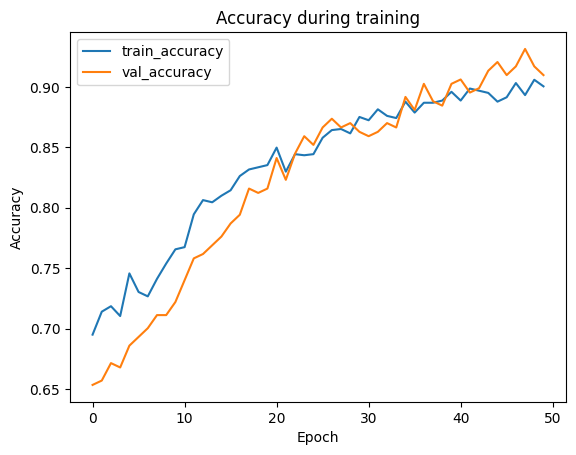

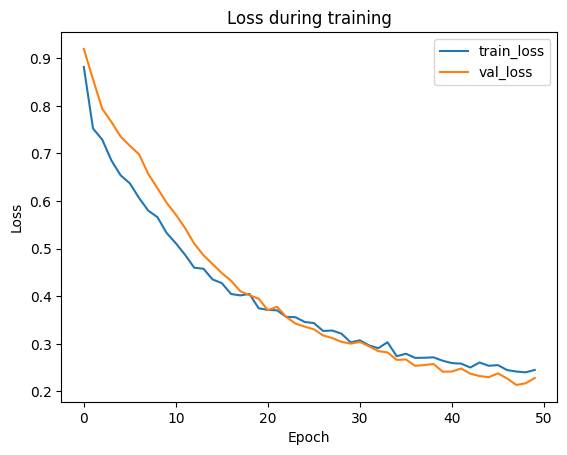

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Преобразуем целевую переменную в one-hot encoding
y_train_tf = to_categorical(y_train)
y_test_tf = to_categorical(y_test)

# Признаки уже числовые, но можно привести к float32
X_train_tf = X_train.astype('float32')
X_test_tf = X_test.astype('float32')

def build_model(input_dim, hidden_layers=[32, 32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    # Входной слой + первый скрытый
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Дополнительные скрытые слои
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    # Выходной слой
    model.add(Dense(y_train_tf.shape[1], activation='softmax'))
    
    # Компиляция модели
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model = build_model(input_dim=X_train_tf.shape[1],
                    hidden_layers=[64, 64],
                    dropout_rate=0.2,
                    learning_rate=0.001)

history = model.fit(X_train_tf, y_train_tf,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[tensorboard_callback])
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {accuracy:.4f}")

# Предсказания
y_pred_prob = model.predict(X_test_tf)
y_pred = y_pred_prob.argmax(axis=1)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC (мультиклассовый)
y_test_bin = label_binarize(y_test, classes=range(y_train_tf.shape[1]))
auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"Test AUC-ROC: {auc:.4f}")

import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График функции потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




# Сравнительный анализ методов классификации

Ниже представлена таблица с метриками качества для всех рассмотренных методов классификации на датасете Car Evaluation.

| Модель          | Лучшие параметры                     | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|-----------------|------------------------------------|---------|-----------|--------|----------|---------|
| GaussianNB       | {}                                 | 0.6243  | 0.3742    | 0.4773 | 0.3188   | 0.8158  |
| MultinomialNB    | {'alpha': 0.1}                     | 0.6850  | 0.4208    | 0.2560 | 0.2147   | 0.7917  |
| ComplementNB     | {'alpha': 0.5}                     | 0.6329  | 0.3333    | 0.3479 | 0.3284   | 0.7764  |
| BernoulliNB      | {'alpha': 0.1, 'binarize': 0.0}   | 0.7312  | 0.3181    | 0.3334 | 0.3234   | 0.8785  |
| Decision Tree    | {'max_depth': None, 'min_samples_split': 2} | 0.9740 | 0.8988 | 0.9415 | 0.9131 | 0.9664 |
| LDA              | {'solver': 'svd'}                  | 0.6676  | 0.2628    | 0.2789 | 0.2652   | 0.7905  |
| SVM              | {'C': 10, 'kernel': 'rbf'}         | 0.9682  | 0.8769    | 0.9355 | 0.8970   | 0.9992  |
| k-NN             | {'n_neighbors': 5, 'weights': 'distance'} | 0.8873 | 0.7774 | 0.6670 | 0.6984 | 0.9679 |
| Neural Network (TensorFlow) | hidden_layers=[64,64], dropout=0.2, lr=0.001 | 0.9306 | 0.9238 (macro) | 0.8196 (macro) | 0.8646 (macro) | — |

---

## Выводы

1. **Лучшие модели по точности и F1-score:**  
   - Decision Tree: Accuracy = 0.974, F1 = 0.913, AUC-ROC = 0.966  
   - SVM: Accuracy = 0.968, F1 = 0.897, AUC-ROC = 0.999  

2. **Нейронная сеть TensorFlow** показывает **высокую точность (93%) и F1-score (0.865)**, уступая только Decision Tree и SVM, но превосходит большинство простых моделей Naive Bayes и LDA.

3. **Методы Naive Bayes** (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB) показали относительно низкую точность и F1-score, что объясняется их сильным предположением о независимости признаков, которое не полностью выполняется в данном датасете.

4. **k-NN** показал неплохие результаты, но уступает деревьям решений и SVM по F1-score и Recall, особенно на классах с меньшей поддержкой.

5. **Рекомендация для данного датасета:**  
   - **Decision Tree** — лучший выбор для простоты интерпретации, высокой точности и AUC-ROC.  
   - **SVM** — альтернатива с очень высоким AUC-ROC, но менее интерпретируемая.  
   - **Нейронная сеть** подходит для экспериментов с архитектурой и настройкой гиперпараметров, но выигрывает преимущественно на больших и сложных данных.

---

**Заключение:**  
Для задачи классификации автомобилей на данном датасете оптимально использовать **деревья решений или SVM**. Нейронная сеть показывает достойные результаты и может быть полезна при расширении датасета или добавлении новых признаков.


# Доп. задание

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.utils import to_categorical

# Загрузка датасета Car Evaluation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1).values.astype('float32')
y = to_categorical(data["class"].values)

num_classes = y.shape[1]
input_dim = X.shape[1]


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(input_dim, hidden_layers=[32,32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [56]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Параметры для поиска
architectures = [[32,32], [64,32], [64,64,32]]
learning_rates = [0.001, 0.005, 0.01]
dropout_rate = 0.2  # фиксированный для эксперимента
epochs = 50
batch_size = 32

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

total_configs = len(architectures) * len(learning_rates)
config_count = 0

for arch in architectures:
    for lr in learning_rates:
        config_count += 1
        print(f"\n=== Конфигурация {config_count}/{total_configs}: Архитектура {arch}, Learning rate {lr} ===")
        
        fold = 1
        fold_accuracies = []
        
        for train_index, val_index in kf.split(X):
            print(f"  -> Обучение на фолде {fold}/5 ...")
            
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # TensorBoard логирование для каждого фолда
            log_dir = f"logs/fit/arch_{arch}_lr_{lr}_fold_{fold}_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)  # ускорение
            
            model = build_model(input_dim=input_dim, hidden_layers=arch, dropout_rate=dropout_rate, learning_rate=lr)
            
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=0,
                callbacks=[tb_callback]
            )
            
            acc = history.history['val_accuracy'][-1]
            fold_accuracies.append(acc)
            print(f"    -> Фолд {fold} завершен, val_accuracy = {acc:.4f}")
            
            fold += 1
        
        mean_acc = np.mean(fold_accuracies)
        print(f"  -> Средняя accuracy для конфигурации: {mean_acc:.4f}")
        
        results.append({
            'Architecture': arch,
            'Learning_Rate': lr,
            'Mean_Val_Accuracy': mean_acc
        })

# Сортировка и вывод результатов
results_df = pd.DataFrame(results).sort_values(by='Mean_Val_Accuracy', ascending=False)
print("\n=== Все результаты отсортированы по Mean_Val_Accuracy ===")
print(results_df)



=== Конфигурация 1/9: Архитектура [32, 32], Learning rate 0.001 ===
  -> Обучение на фолде 1/5 ...


d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    -> Фолд 1 завершен, val_accuracy = 0.8757
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 0.9133
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 0.8815
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 0.9275
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 0.8754
  -> Средняя accuracy для конфигурации: 0.8947

=== Конфигурация 2/9: Архитектура [32, 32], Learning rate 0.005 ===
  -> Обучение на фолде 1/5 ...
    -> Фолд 1 завершен, val_accuracy = 0.9624
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 0.9595
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 0.9566
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 0.9652
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 0.9536
  -> Средняя accuracy для конфигурации: 0.9595

=== Конфигурация 3/9: Архитектура [32, 32], Learning rate 0.01 ===
  -> Обучение на фолде 1/5 ...

In [57]:
best_config = results_df.iloc[0]
best_arch = best_config['Architecture']
best_lr = best_config['Learning_Rate']

final_model = build_model(input_dim=input_dim, hidden_layers=best_arch, dropout_rate=dropout_rate, learning_rate=best_lr)
history_final = final_model.fit(
    X, y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[TensorBoard(log_dir="logs/fit/final_model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)]
)

# Оценка финальной модели
final_acc = history_final.history['val_accuracy'][-1]
print(f"Final model validation accuracy: {final_acc:.4f}")


Epoch 1/50


d:\Dev\ML_lab\Lab3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7080 - loss: 0.7216 - val_accuracy: 0.4566 - val_loss: 1.3196
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7331 - loss: 0.5787 - val_accuracy: 0.5491 - val_loss: 1.2528
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7473 - loss: 0.5205 - val_accuracy: 0.5434 - val_loss: 1.3131
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.4816 - val_accuracy: 0.5376 - val_loss: 1.2738
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8148 - loss: 0.4553 - val_accuracy: 0.5549 - val_loss: 0.9960
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8354 - loss: 0.4077 - val_accuracy: 0.5780 - val_loss: 0.9337
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.3773 - val_accuracy: 0.5780 - val_loss: 0.8373
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.3548 - val_accuracy: 0.6474 - val_loss: 0.7838
Ep

In [58]:
baseline_model = build_model(input_dim=input_dim, hidden_layers=[32], dropout_rate=0.0, learning_rate=0.001)
history_baseline = baseline_model.fit(
    X, y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=0
)
baseline_acc = history_baseline.history['val_accuracy'][-1]
print(f"Baseline model validation accuracy: {baseline_acc:.4f}")


Baseline model validation accuracy: 0.6185
